In [21]:
pip install --upgrade tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1c/c3/17c6aa1dd5bc8cea5bf00d0c3a021a5dd1680c250861cc877a7e556e4b9b/tensorflow-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/cb/90/599c79a248dcae6935331113649de5d75427e320efde21b583648b498584/tensorflow_intel-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/55/51/c430b4f5f4a6df00aa41c1ee195e179489565e61cfad559506ca7442ce67/ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.pythonhosted.org/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ana\\Lib\\site-packages\\~ensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
pip install pandas matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\ana\lib\site-packages (1.5.3)



# INSTALL LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

# DATA LOAD

In [20]:
data = pd.read_csv("C:/Users/HA Traders/Downloads/archive (5)/Tweets.csv")  # Adjust this to your data file

In [21]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


# DATA VISUALIZING

In [22]:
review_df = data[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [23]:
review_df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

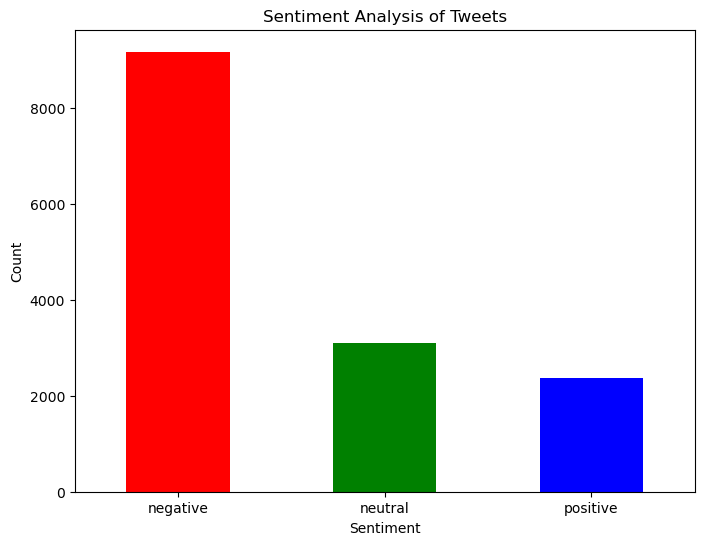

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
sentiment_counts = data['airline_sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the chart
plt.show()


# DATA LABEL ENCODING

In [27]:
label_encoder = LabelEncoder()
data["airline_sentiment"] = label_encoder.fit_transform(data["airline_sentiment"])

In [28]:
max_words = 10000  # Maximum number of words in your vocabulary
max_sequence_length = 100  # Maximum length of a tweet

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# DATA SPLITING

In [29]:
y = data["airline_sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DATA MODEL IMPLEMENTING

In [30]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encoding for labels
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 lstm_4 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1362627 (5.20 MB)
Trainable params: 1362627 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [39]:
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/5
183/183 [==============================] - 118s 599ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 1.2525 - val_accuracy: 0.7729
Epoch 2/5
183/183 [==============================] - 41s 222ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 1.2669 - val_accuracy: 0.7678
Epoch 3/5
183/183 [==============================] - 45s 249ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 1.3823 - val_accuracy: 0.7657
Epoch 4/5
183/183 [==============================] - 51s 277ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 1.3937 - val_accuracy: 0.7510
Epoch 5/5
183/183 [==============================] - 50s 274ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 1.1747 - val_accuracy: 0.7736


# CHECK DATA LOSS AND ACCURACY

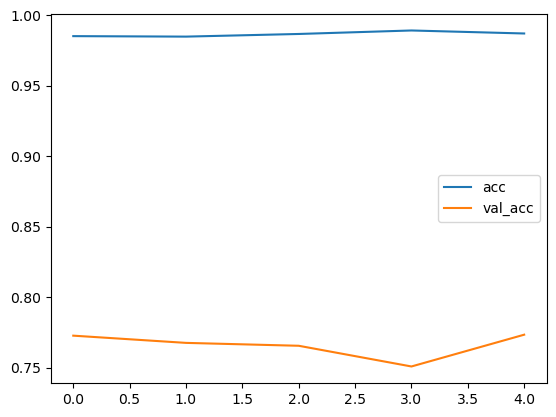

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


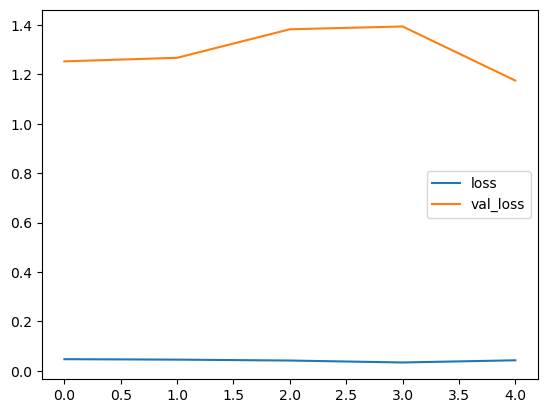

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

# PREDICTION OF TEXT CLASSIFICATION 

In [42]:
def predict_sentiment(tweet):
    sequence = tokenizer.texts_to_sequences([tweet])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)
    sentiment = np.argmax(prediction)
    return sentiment

# Example of using the predict_sentiment function
sample_tweet = "This is a great day on flight!"
predicted_sentiment = predict_sentiment(sample_tweet)
sentiments = ["Negative", "Neutral", "Positive"]
print(f"The sentiment of the tweet is: {sentiments[predicted_sentiment]}")

1/1 [==============================] - 0s 302ms/step
The sentiment of the tweet is: Positive
